<a href="https://colab.research.google.com/github/prashantx16/OIBSIP/blob/main/AndroidAppMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# STEP 1: IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import files
files.upload()
uploaded = files.upload()


Saving apps.csv to apps.csv


Saving user_reviews.csv to user_reviews.csv


In [7]:
apps = pd.read_csv('/content/apps.csv')
reviews = pd.read_csv('/content/user_reviews.csv')


In [8]:
apps.drop_duplicates(inplace=True)
apps.dropna(inplace=True)

In [9]:
apps['Reviews'] = apps['Reviews'].astype(int)
apps['Installs'] = apps['Installs'].str.replace('[+,]', '', regex=True).astype(int)
apps['Price'] = apps['Price'].str.replace('$', '', regex=False).astype(float) # Use regex=False for literal replacement

In [10]:
# Clean Size column
apps['Size'] = apps['Size'].replace('Varies with device', np.nan)
# Convert to string type first to ensure .str accessor works
# Also handle variations like 'K', 'm', 'M'
apps['Size'] = apps['Size'].astype(str).str.replace('[kKmM]', '', regex=True)
apps['Size'] = pd.to_numeric(apps['Size'], errors='coerce') # Convert to numeric, coercing errors to NaN
apps.dropna(subset=['Size'], inplace=True) # Drop NaNs introduced by conversion

In [11]:
# Convert Rating to numeric and drop missing
apps['Rating'] = pd.to_numeric(apps['Rating'], errors='coerce')
apps.dropna(subset=['Rating'], inplace=True)

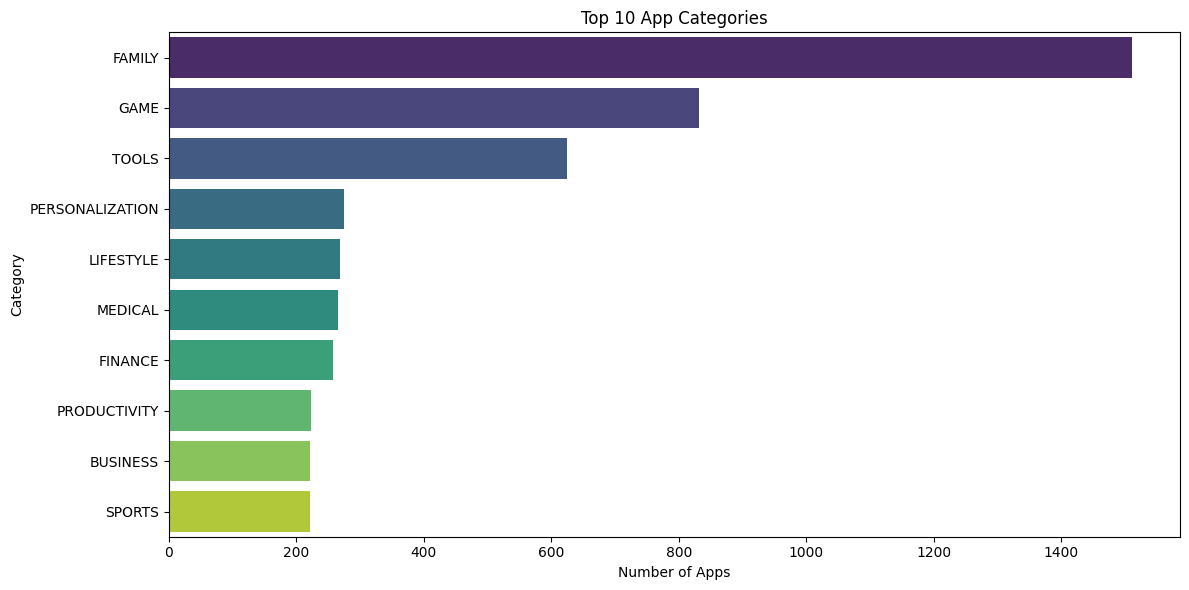

In [12]:
# STEP 4: CATEGORY EXPLORATION
plt.figure(figsize=(12,6))
sns.countplot(data=apps, y='Category', order=apps['Category'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 App Categories')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


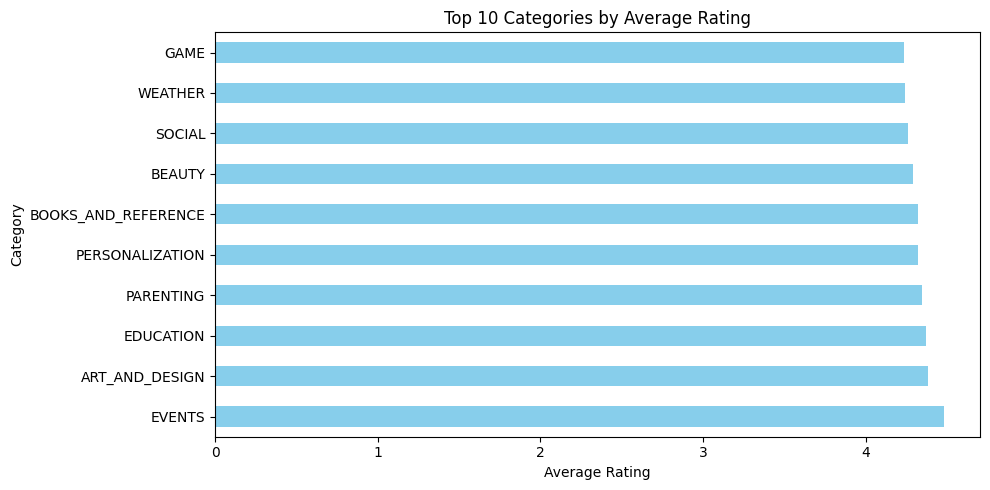

In [13]:
# STEP 5: METRICS ANALYSIS
# Avg Rating per Category
avg_rating = apps.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
avg_rating.plot(kind='barh', color='skyblue')
plt.title('Top 10 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.tight_layout()
plt.show()

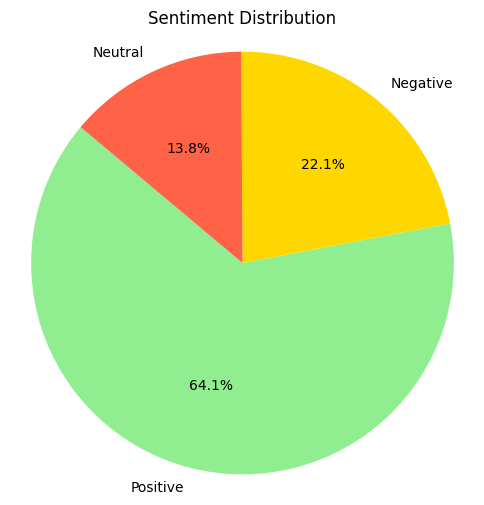

In [15]:
# STEP 6: SENTIMENT ANALYSIS
reviews_clean = reviews.dropna(subset=['Sentiment'])

# Pie Chart
sentiment_counts = reviews_clean['Sentiment'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=['lightgreen','gold','tomato'], startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

In [16]:
# STEP 7: INTERACTIVE VISUALIZATION
fig = px.scatter(apps, x='Rating', y='Reviews', color='Category',
                 size='Installs', hover_name='App',
                 title='App Rating vs Reviews with Install Size')
fig.show()